In [28]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the time module.
import time

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f7c607f31937b87875b56e7bafdcf80c


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)  # this function helps in zipping the longitude and latitude with same index number togther
lat_lngs 

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | progreso
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | coahuayana
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | yulara
Processing Record 6 of Set 1 | north bend
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | ahuimanu
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | yamada
Processing Record 13 of Set 1 | nemuro
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | esna
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | mrirt
City not found. Skipping...
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | sibolga
Processing Record 22 of Set 1 | port lincoln
Processing Record 23 of Set 1 | dikson
Processing Record 24 of Set 1 | klaksvik
Processing Rec

Processing Record 40 of Set 4 | bluff
Processing Record 41 of Set 4 | san juan
Processing Record 42 of Set 4 | saint-augustin
Processing Record 43 of Set 4 | nova esperanca
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | nelson bay
Processing Record 46 of Set 4 | oistins
Processing Record 47 of Set 4 | omaruru
Processing Record 48 of Set 4 | puerto penasco
Processing Record 49 of Set 4 | carnarvon
Processing Record 50 of Set 4 | gashua
Processing Record 1 of Set 5 | jablah
Processing Record 2 of Set 5 | bajil
Processing Record 3 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 5 | angoche
Processing Record 5 of Set 5 | fukue
Processing Record 6 of Set 5 | lorengau
Processing Record 7 of Set 5 | dubbo
Processing Record 8 of Set 5 | valparaiso
Processing Record 9 of Set 5 | whakatane
Processing Record 10 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 5 | ratangarh
Processing Record 12 of Set 5 | geraldto

Processing Record 27 of Set 8 | lufilufi
Processing Record 28 of Set 8 | paamiut
Processing Record 29 of Set 8 | taoudenni
Processing Record 30 of Set 8 | tacoronte
Processing Record 31 of Set 8 | severo-kurilsk
Processing Record 32 of Set 8 | ulaangom
Processing Record 33 of Set 8 | punta alta
Processing Record 34 of Set 8 | labytnangi
Processing Record 35 of Set 8 | keffi
Processing Record 36 of Set 8 | laurel
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 39 of Set 8 | chaoyang
Processing Record 40 of Set 8 | meiningen
Processing Record 41 of Set 8 | fairbanks
Processing Record 42 of Set 8 | xuddur
Processing Record 43 of Set 8 | turayf
Processing Record 44 of Set 8 | banjar
Processing Record 45 of Set 8 | hay river
Processing Record 46 of Set 8 | nantucket
Processing Record 47 of Set 8 | acarau
City not found. Skipping...
Processing Record 48 of Set 8 | makung
City not found. Skipping...
Processing

City not found. Skipping...
Processing Record 14 of Set 12 | port-de-paix
City not found. Skipping...
Processing Record 15 of Set 12 | coihaique
Processing Record 16 of Set 12 | honningsvag
Processing Record 17 of Set 12 | neiafu
Processing Record 18 of Set 12 | yerbogachen
Processing Record 19 of Set 12 | barcelos
Processing Record 20 of Set 12 | cobija
Processing Record 21 of Set 12 | aginskoye
Processing Record 22 of Set 12 | moyo
City not found. Skipping...
Processing Record 23 of Set 12 | gualeguay
Processing Record 24 of Set 12 | lazaro cardenas
Processing Record 25 of Set 12 | omboue
Processing Record 26 of Set 12 | lahij
Processing Record 27 of Set 12 | walvis bay
Processing Record 28 of Set 12 | sisimiut
Processing Record 29 of Set 12 | kuching
Processing Record 30 of Set 12 | inuvik
Processing Record 31 of Set 12 | namibe
Processing Record 32 of Set 12 | gilgit
Processing Record 33 of Set 12 | dongsheng
Processing Record 34 of Set 12 | sao geraldo do araguaia
Processing Recor

In [15]:
#checking length of the cities 
len(city_data)

544

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Progreso,-34.68,-56.22,66.99,48,0,3.36,UY,2019-11-06 03:30:18
1,Kapaa,22.08,-159.32,82.40,78,40,2.30,US,2019-11-06 03:30:18
2,Coahuayana,18.62,-100.35,74.10,82,25,2.71,MX,2019-11-06 03:30:18
3,Bethel,60.79,-161.76,30.20,100,90,11.41,US,2019-11-06 03:30:18
4,Yulara,-25.24,130.99,89.60,7,15,6.93,AU,2019-11-06 03:30:18
5,North Bend,43.41,-124.22,48.99,100,90,12.75,US,2019-11-06 03:30:18
6,Rikitea,-23.12,-134.97,77.63,77,67,1.41,PF,2019-11-06 03:30:19
7,Pevek,69.70,170.27,15.67,79,88,3.74,RU,2019-11-06 03:30:19
8,Ushuaia,-54.81,-68.31,35.60,98,90,6.93,AR,2019-11-06 03:25:27
9,Ahuimanu,21.44,-157.84,81.00,74,75,5.82,US,2019-11-06 03:30:19


In [22]:
# reaaranging the column order
 new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [24]:
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Progreso,UY,2019-11-06 03:30:18,-34.68,-56.22,66.99,48,0,3.36
1,Kapaa,US,2019-11-06 03:30:18,22.08,-159.32,82.40,78,40,2.30
2,Coahuayana,MX,2019-11-06 03:30:18,18.62,-100.35,74.10,82,25,2.71
3,Bethel,US,2019-11-06 03:30:18,60.79,-161.76,30.20,100,90,11.41
4,Yulara,AU,2019-11-06 03:30:18,-25.24,130.99,89.60,7,15,6.93
...,...,...,...,...,...,...,...,...,...
539,Izhma,RU,2019-11-06 03:32:15,65.01,53.91,14.50,96,59,2.48
540,Carauari,BR,2019-11-06 03:32:15,-4.88,-66.90,76.39,88,79,1.19
541,Kalach-Na-Donu,RU,2019-11-06 03:32:15,48.69,43.52,44.60,100,100,8.95
542,Khurba,RU,2019-11-06 03:32:15,50.41,136.89,29.86,87,94,9.35


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

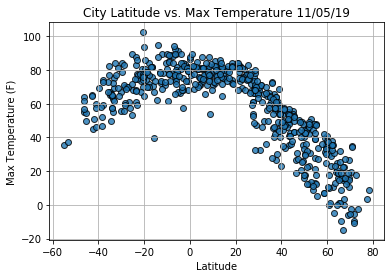

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Adding other graph properties 
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

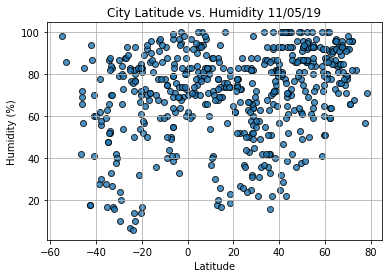

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

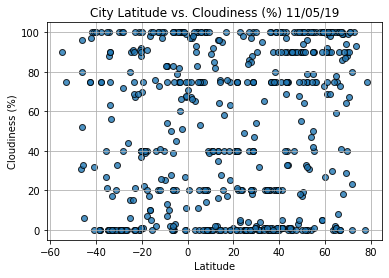

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

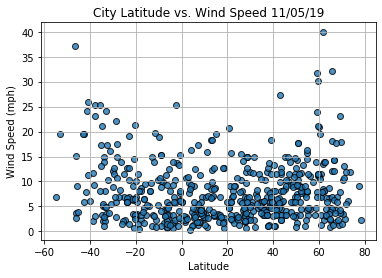

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()